# Using LINEAR REGRESSION

The main problem with this method is that we can use it if and only if we have a relationship between X and Y.

We assume that there is a relation between the fact of having a bank account and the others information given in the final project

## The preliminaries

In [157]:
# Import the libraries
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import scipy.linalg
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [158]:
# Load the training data
df = pd.read_csv("train.csv")

In [159]:
df

,Unnamed: 0,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,year_,relationship_with_head_Child,relationship_with_head_Head of Household,...,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,country__Kenya,country__Rwanda,country__Tanzania,country__Uganda
0,0,1,0,1,3,24,0,2018,0,0,...,0,0,0,0,0,1,1,0,0,0
1,1,0,0,0,5,70,0,2018,0,1,...,1,0,0,0,0,0,1,0,0,0
2,2,1,1,1,5,26,1,2018,0,0,...,0,0,0,0,0,1,1,0,0,0
3,3,0,0,1,5,34,0,2018,0,1,...,0,0,0,0,0,0,1,0,0,0
4,4,0,1,0,8,26,1,2018,1,0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,23519,0,0,1,4,48,0,2018,0,1,...,0,0,0,1,0,0,0,0,0,1
23520,23520,0,0,1,2,27,0,2018,0,1,...,0,0,0,1,0,0,0,0,0,1
23521,23521,0,0,1,5,27,0,2018,0,0,...,0,0,0,1,0,0,0,0,0,1
23522,23522,0,1,1,7,30,0,2018,0,0,...,0,0,0,0,0,1,0,0,0,1


In [160]:
# Delete the columns that are useless
df = df.drop(["year_"], axis=1)  # <- Their DataTypes will ruin our code

In [161]:
df

,Unnamed: 0,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head_Child,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,...,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,country__Kenya,country__Rwanda,country__Tanzania,country__Uganda
0,0,1,0,1,3,24,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1,1,0,0,0,5,70,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
2,2,1,1,1,5,26,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
3,3,0,0,1,5,34,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,4,0,1,0,8,26,1,1,0,0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,23519,0,0,1,4,48,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
23520,23520,0,0,1,2,27,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
23521,23521,0,0,1,5,27,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
23522,23522,0,1,1,7,30,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [162]:
# We should separate the targets from the other data
Y_train = df["bank_account"] # We assign the target's data to "Y_train"
X_train = df.drop("bank_account", axis=1) # We assign the remain data to "X_train"

In [163]:
Y_train

0        1
1        0
2        1
3        0
4        0
        ..
23519    0
23520    0
23521    0
23522    0
23523    0
Name: bank_account, Length: 23524, dtype: int64

In [164]:
X_train

,Unnamed: 0,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head_Child,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,relationship_with_head_Other relative,...,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,country__Kenya,country__Rwanda,country__Tanzania,country__Uganda
0,0,0,1,3,24,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1,1,0,0,5,70,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
2,2,1,1,5,26,1,0,0,0,1,...,0,0,0,0,0,1,1,0,0,0
3,3,0,1,5,34,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,4,1,0,8,26,1,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,23519,0,1,4,48,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
23520,23520,0,1,2,27,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
23521,23521,0,1,5,27,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
23522,23522,1,1,7,30,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [165]:
# We turn all our data into arrays
Y_train = Y_train.values 
X_train = X_train.values

In [166]:
Y_train

array([1, 0, 1, ..., 0, 0, 0])

In [167]:
X_train

array([[    0,     0,     1, ...,     0,     0,     0],
       [    1,     0,     0, ...,     0,     0,     0],
       [    2,     1,     1, ...,     0,     0,     0],
       ...,
       [23521,     0,     1, ...,     0,     0,     1],
       [23522,     1,     1, ...,     0,     0,     1],
       [23523,     0,     1, ...,     0,     0,     1]])

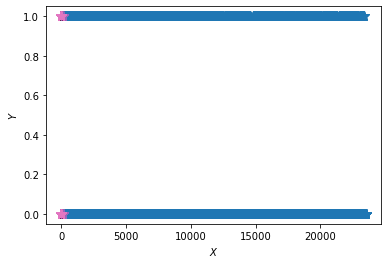

In [168]:
plt.figure()
plt.plot(X_train, Y_train, '*', markersize=10) # Markersize is for the size of the points on the figure
plt.xlabel("$X$") # The label is putted between "$...$"
plt.ylabel("$Y$"); # The label is putted between "$...$"


## DEFINE THE MODEL

In [169]:
# We define the model
model = LinearRegression()

## TRAIN

In [170]:
# We train the model
model.fit(X_train, Y_train)

LinearRegression()

## TEST

In [171]:
# Load the test data
df = pd.read_csv("test.csv")

In [172]:
df

,Unnamed: 0,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,year_,relationship_with_head_Child,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,...,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,country__Kenya,country__Rwanda,country__Tanzania,country__Uganda
0,0,1,1,3,30,1,2018,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,1,1,1,7,51,1,2018,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,2,0,0,3,77,0,2018,0,0,0,...,0,0,0,0,1,0,1,0,0,0
3,3,0,0,6,39,0,2018,0,1,0,...,0,0,0,0,1,0,1,0,0,0
4,4,1,0,3,16,1,2018,1,0,0,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10081,10081,0,0,2,62,0,2018,0,0,0,...,0,0,0,0,0,1,0,0,0,1
10082,10082,1,1,8,42,1,2018,0,1,0,...,0,0,0,0,0,1,0,0,0,1
10083,10083,1,1,1,39,1,2018,0,1,0,...,0,0,0,1,0,0,0,0,0,1
10084,10084,0,1,6,28,0,2018,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [173]:
# Delete the columns that are useless
df = df.drop(["year_"], axis=1) # <- Their DataTypes will ruin our code

In [174]:
df

,Unnamed: 0,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head_Child,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,relationship_with_head_Other relative,...,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,country__Kenya,country__Rwanda,country__Tanzania,country__Uganda
0,0,1,1,3,30,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,1,1,7,51,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,2,0,0,3,77,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
3,3,0,0,6,39,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
4,4,1,0,3,16,1,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10081,10081,0,0,2,62,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
10082,10082,1,1,8,42,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
10083,10083,1,1,1,39,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
10084,10084,0,1,6,28,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [175]:
# We assign all our values to "X_test"
X_test = df
X_test = X_test.values # <- We turn all data into arrays

In [176]:
X_test

array([[    0,     1,     1, ...,     0,     0,     0],
       [    1,     1,     1, ...,     0,     0,     0],
       [    2,     0,     0, ...,     0,     0,     0],
       ...,
       [10083,     1,     1, ...,     0,     0,     1],
       [10084,     0,     1, ...,     0,     0,     1],
       [10085,     1,     1, ...,     0,     0,     1]])

In [177]:
# We use the model that we created earlier in order to predict the "Y_test"
Y_test_predict = model.predict(X_test)

In [178]:
Y_test_predict

array([0.73194594, 0.87465221, 0.00356534, ..., 0.28560625, 0.04271941,
       0.17678827])

In [179]:
# We predict the "Y_train" in order to calculate the MSE
Y_train_predict = model.predict(X_train)

In [180]:
Y_train_predict

array([ 0.30108955,  0.17207649,  0.51782995, ..., -0.00536114,
        0.1056847 ,  0.04538148])

## MSE

In [181]:
mean_squared_error(Y_train, Y_train_predict)

0.08907515297496826